# GEOG5995M Final Portfolio: Do Local Authority Districts within the UK that have a High Multiple Deprivation Score also Have a High Crime Rate?

Student ID number: 201799057

# Non-Spatial Analysis (Linear Regression)

In [1]:
#Required packages improted below for both spatial and non-spatial environments (for use in both geog_env and spatial_env)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Required packages imported below for the non-spatial analysis (for use in geog_env)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the Deprivation Index (Dep_Ind_df) datasets into Python
location = r"C:\Users\Michael\Documents\University of Leeds\201799057_Final Project_GEOG5995M\File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv"
Dep_Ind_df = pd.read_csv(location)

The IMD of the UK [1] is used as it highlights the multiple derprivation levels of smaller areas using the LSOA codes and names as well as larger areas identified through the Local Authority District codes and names. It allows us to compare the IMD score with that of the crime score to better understand the effects of crime on the multiple deprivation levels within the UK. This data was also collected for public use by the UK Government. It should be noted that the purpose of this dataset is to identify the most deprived small areas, compare local authority districts, and exploring different types of deprivation and should not be used to quantify deprivation or provide analysis of individual wealth of people within these areas and local authority districts [2].

In [5]:
Dep_Ind_df.dtypes

LSOA code (2011)                                                                                       object
LSOA name (2011)                                                                                       object
Local Authority District code (2013)                                                                   object
Local Authority District name (2013)                                                                   object
Index of Multiple Deprivation (IMD) Score                                                             float64
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                                     int64
Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)                      int64
Income Score (rate)                                                                                   float64
Income Rank (where 1 is most deprived)                                                                  int64
Income Dec

In [6]:
Dep_Ind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 57 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   LSOA code (2011)                                                                                    32844 non-null  object 
 1   LSOA name (2011)                                                                                    32844 non-null  object 
 2   Local Authority District code (2013)                                                                32844 non-null  object 
 3   Local Authority District name (2013)                                                                32844 non-null  object 
 4   Index of Multiple Deprivation (IMD) Score                                                           32844 non-nu

In [7]:
#Identifying potential missing data
Dep_Ind_df.isna()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Dependent Children aged 0-15: mid 2012 (excluding prisoners),Population aged 16-59: mid 2012 (excluding prisoners),Older population aged 60 and over: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32839,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32841,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32842,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Cleaning the Deprivation Index by removing columns that are irrelevant to my research question.
Dep_Ind = Dep_Ind_df.drop(columns=['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
                                   'Income Rank (where 1 is most deprived)', 
                                   'Employment Rank (where 1 is most deprived)', 
                                   'Education, Skills and Training Rank (where 1 is most deprived)', 
                                   'Health Deprivation and Disability Score', 
                                   'Health Deprivation and Disability Rank (where 1 is most deprived)', 
                                   'Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Crime Rank (where 1 is most deprived)', 
                                   'Barriers to Housing and Services Score', 
                                   'Barriers to Housing and Services Rank (where 1 is most deprived)', 
                                   'Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Living Environment Score', 'Living Environment Rank (where 1 is most deprived)', 
                                   'Living Environment Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Income Deprivation Affecting Children Index (IDACI) Score (rate)', 
                                   'Income Deprivation Affecting Children Index (IDACI) Rank (where 1 is most deprived)', 
                                   'Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Income Deprivation Affecting Older People (IDAOPI) Score (rate)', 
                                   'Income Deprivation Affecting Older People (IDAOPI) Rank (where 1 is most deprived)', 
                                   'Income Deprivation Affecting Older People (IDAOPI) Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Children and Young People Sub-domain Score', 
                                   'Children and Young People Sub-domain Rank (where 1 is most deprived)', 
                                   'Children and Young People Sub-domain Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Adult Skills Sub-domain Score', 
                                   'Adult Skills Sub-domain Rank (where 1 is most deprived)', 
                                   'Adult Skills Sub-domain Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Geographical Barriers Sub-domain Score', 
                                   'Geographical Barriers Sub-domain Rank (where 1 is most deprived)', 
                                   'Geographical Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Wider Barriers Sub-domain Score', 
                                   'Wider Barriers Sub-domain Rank (where 1 is most deprived)', 
                                   'Wider Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Indoors Sub-domain Score', 
                                   'Indoors Sub-domain Rank (where 1 is most deprived)', 
                                   'Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Outdoors Sub-domain Score', 
                                   'Outdoors Sub-domain Rank (where 1 is most deprived)', 
                                   'Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs)', 
                                   'Dependent Children aged 0-15: mid 2012 (excluding prisoners)', 
                                   'Population aged 16-59: mid 2012 (excluding prisoners)', 
                                   'Older population aged 60 and over: mid 2012 (excluding prisoners)',])
Dep_Ind.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Score","Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)",Crime Score,Crime Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01031349,Adur 001A,E07000223,Adur,12.389,7,0.096,6,0.083,6,20.055,5,0.242,4,1318,702.75
1,E01031350,Adur 001B,E07000223,Adur,28.619,3,0.187,3,0.162,3,34.653,3,0.244,4,1212,720.75
2,E01031351,Adur 001C,E07000223,Adur,11.713,7,0.065,8,0.066,8,26.334,4,0.495,3,1577,838.25
3,E01031352,Adur 001D,E07000223,Adur,16.446,6,0.117,5,0.113,5,25.779,4,0.026,5,1453,748.25
4,E01031370,Adur 001E,E07000223,Adur,18.265,5,0.102,6,0.115,5,32.056,3,0.182,5,1443,795.50


In [9]:
Dep_Ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 16 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   LSOA code (2011)                                                                                    32844 non-null  object 
 1   LSOA name (2011)                                                                                    32844 non-null  object 
 2   Local Authority District code (2013)                                                                32844 non-null  object 
 3   Local Authority District name (2013)                                                                32844 non-null  object 
 4   Index of Multiple Deprivation (IMD) Score                                                           32844 non-nu

In [10]:
#Next I will be grouping the Deprivation Index dataset by the local authority district name in the latest time period, taking the series of the LSOA code (2011),...
#..., the LSOA name (2011), and the local authority district code (2011), while taking the mean average of every other variable.
Dep_Ind_LA = Dep_Ind.groupby('Local Authority District name (2013)').agg({'LSOA code (2011)':pd.Series.mode, 
                                                                          'LSOA name (2011)':pd.Series.mode ,
                                                                          'Local Authority District code (2013)':pd.Series.mode,
                                                                          'Index of Multiple Deprivation (IMD) Score':'mean', 
                                                                          'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)':'mean',
                                                                          'Income Score (rate)': 'mean', 
                                                                          'Income Decile (where 1 is most deprived 10% of LSOAs)':'mean',
                                                                          'Employment Score (rate)':'mean', 
                                                                          'Employment Decile (where 1 is most deprived 10% of LSOAs)':'mean',
                                                                          'Education, Skills and Training Score':'mean', 
                                                                          'Crime Score':'mean', 
                                                                          'Crime Decile (where 1 is most deprived 10% of LSOAs)':'mean', 
                                                                          'Total population: mid 2012 (excluding prisoners)':'mean'})
Dep_Ind_LA.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Score",Crime Score,Crime Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners)
Local Authority District name (2013),,,,,,,,,,,,,
Adur,"[E01031338, E01031339, E01031340, E01031341, E...","[Adur 001A, Adur 001B, Adur 001C, Adur 001D, A...",E07000223,18.326714,5.642857,0.123548,5.642857,0.105119,5.666667,28.010476,-0.104905,5.880952,1474.500000
Allerdale,"[E01019078, E01019079, E01019080, E01019081, E...","[Allerdale 001A, Allerdale 001B, Allerdale 001...",E07000026,22.248450,5.100000,0.130583,5.900000,0.125900,5.200000,25.196500,-0.409033,6.683333,1604.466667
Amber Valley,"[E01019400, E01019401, E01019402, E01019403, E...","[Amber Valley 001A, Amber Valley 001B, Amber V...",E07000032,18.175795,5.910256,0.126577,5.743590,0.112628,5.423077,24.428449,-0.381795,6.897436,1573.666667
Arun,"[E01031380, E01031381, E01031382, E01031383, E...","[Arun 001A, Arun 001B, Arun 001C, Arun 001D, A...",E07000224,17.669702,6.000000,0.118936,5.840426,0.101947,5.755319,25.505904,-0.250489,6.489362,1605.074468
Ashfield,"[E01027925, E01027926, E01027927, E01027928, E...","[Ashfield 001A, Ashfield 001B, Ashfield 001C, ...",E07000170,25.586216,4.418919,0.168649,4.513514,0.155608,3.675676,35.147743,0.088973,5.121622,1623.391892


In [11]:
Dep_Ind_LSOA = Dep_Ind.groupby('LSOA name (2011)').agg({'Local Authority District name (2013)':pd.Series.mode, 
                                                        'LSOA code (2011)':pd.Series.mode , 
                                                        'Local Authority District code (2013)':pd.Series.mode, 
                                                        'Index of Multiple Deprivation (IMD) Score':'mean', 
                                                        'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)':'mean', 
                                                        'Income Score (rate)': 'mean', 
                                                        'Income Decile (where 1 is most deprived 10% of LSOAs)':'mean', 
                                                        'Employment Score (rate)':'mean', 
                                                        'Employment Decile (where 1 is most deprived 10% of LSOAs)':'mean', 
                                                        'Education, Skills and Training Score':'mean',
                                                        'Crime Score':'mean',
                                                        'Crime Decile (where 1 is most deprived 10% of LSOAs)':'mean', 
                                                        'Total population: mid 2012 (excluding prisoners)':'mean'})
Dep_Ind_LSOA.head()

,Local Authority District name (2013),LSOA code (2011),Local Authority District code (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Score",Crime Score,Crime Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners)
LSOA name (2011),,,,,,,,,,,,,
Adur 001A,Adur,E01031349,E07000223,12.389,7.0,0.096,6.0,0.083,6.0,20.055,0.242,4.0,1318.0
Adur 001B,Adur,E01031350,E07000223,28.619,3.0,0.187,3.0,0.162,3.0,34.653,0.244,4.0,1212.0
Adur 001C,Adur,E01031351,E07000223,11.713,7.0,0.065,8.0,0.066,8.0,26.334,0.495,3.0,1577.0
Adur 001D,Adur,E01031352,E07000223,16.446,6.0,0.117,5.0,0.113,5.0,25.779,0.026,5.0,1453.0
Adur 001E,Adur,E01031370,E07000223,18.265,5.0,0.102,6.0,0.115,5.0,32.056,0.182,5.0,1443.0


In [10]:
Dep_Ind_LACo = Dep_Ind.groupby('Local Authority District code (2013)').agg({'LSOA code (2011)':pd.Series.mode, 
                                                                          'LSOA name (2011)':pd.Series.mode ,
                                                                          'Local Authority District code (2013)':pd.Series.mode,
                                                                          'Index of Multiple Deprivation (IMD) Score':'mean', 
                                                                          'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)':'mean',
                                                                          'Income Score (rate)': 'mean', 
                                                                          'Income Decile (where 1 is most deprived 10% of LSOAs)':'mean',
                                                                          'Employment Score (rate)':'mean', 
                                                                          'Employment Decile (where 1 is most deprived 10% of LSOAs)':'mean',
                                                                          'Education, Skills and Training Score':'mean', 
                                                                          'Crime Score':'mean', 
                                                                          'Crime Decile (where 1 is most deprived 10% of LSOAs)':'mean', 
                                                                          'Total population: mid 2012 (excluding prisoners)':'mean'})
Dep_Ind_LACo.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Score",Crime Score,Crime Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners)
Local Authority District code (2013),,,,,,,,,,,,,
E06000001,"[E01011949, E01011950, E01011951, E01011952, E...","[Hartlepool 001A, Hartlepool 001B, Hartlepool ...",E06000001,32.873259,3.948276,0.237103,3.655172,0.208741,3.017241,29.859017,0.089621,5.189655,1590.310345
E06000002,"[E01012007, E01012008, E01012009, E01012010, E...","[Middlesbrough 001A, Middlesbrough 001D, Middl...",E06000002,40.063686,3.441860,0.267977,3.465116,0.215593,3.081395,40.201884,0.616465,3.488372,1613.302326
E06000003,"[E01012095, E01012096, E01012097, E01012098, E...","[Redcar and Cleveland 001A, Redcar and Clevela...",E06000003,28.561625,4.568182,0.202920,4.352273,0.183443,3.556818,27.790705,0.002250,5.420455,1534.068182
E06000004,"[E01012187, E01012188, E01012189, E01012190, E...","[Stockton-on-Tees 001A, Stockton-on-Tees 001B,...",E06000004,24.100725,5.375000,0.173725,5.183333,0.153542,4.533333,24.141742,-0.284742,6.408333,1595.466667
E06000005,"[E01012304, E01012305, E01012306, E01012307, E...","[Darlington 001B, Darlington 001C, Darlington ...",E06000005,24.541692,5.107692,0.174477,4.830769,0.152615,4.323077,23.336600,0.238800,4.553846,1619.200000


In [12]:
Dep_Ind_LSOA = Dep_Ind.groupby('LSOA name (2011)').agg({'Local Authority District name (2013)':pd.Series.mode, 
                                                        'LSOA code (2011)':pd.Series.mode , 
                                                        'Local Authority District code (2013)':pd.Series.mode, 
                                                        'Index of Multiple Deprivation (IMD) Score':'mean', 
                                                        'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)':'mean', 
                                                        'Income Score (rate)': 'mean', 
                                                        'Income Decile (where 1 is most deprived 10% of LSOAs)':'mean', 
                                                        'Employment Score (rate)':'mean', 
                                                        'Employment Decile (where 1 is most deprived 10% of LSOAs)':'mean', 
                                                        'Education, Skills and Training Score':'mean',
                                                        'Crime Score':'mean',
                                                        'Crime Decile (where 1 is most deprived 10% of LSOAs)':'mean', 
                                                        'Total population: mid 2012 (excluding prisoners)':'mean'})

The data was cleaned with the focus of providing an analysis to the relationship between the crime score and the IMD score. After checking for missing data, I decided to remove columns which were irrelevant to the analysis. For the purposes of this analysis, I use the the LSOA code (2011) grouped dataframe. For the other identification variables, I used its series while I took the mean of the remaining index variables.

In [13]:
#Here, I will perform a simple linear regression between the Index of Multiple Depivation Score (Dependent Variable) and the Crime Score (explanatory variable) for each local authority district (name) 2013
X = Dep_Ind_LA["Crime Score"]
y = Dep_Ind_LA["Index of Multiple Deprivation (IMD) Score"]
model = sm.OLS(y, X).fit()
Lin_Predict_Model = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Index of Multiple Deprivation (IMD) Score   R-squared (uncentered):                   0.000
Model:                                                   OLS   Adj. R-squared (uncentered):             -0.003
Method:                                        Least Squares   F-statistic:                            0.08386
Date:                                       Thu, 14 Dec 2023   Prob (F-statistic):                       0.772
Time:                                               14:14:23   Log-Likelihood:                         -1455.1
No. Observations:                                        326   AIC:                                      2912.
Df Residuals:                                            325   BIC:                                      2916.
Df Model:                                                  1                                                  
Covariance Type:                                   nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Crime Score     0.7049      2.434      0.290      0.772      -4.084       5.493
==============================================================================
Omnibus:                       17.068   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.118
Skew:                           0.552   Prob(JB):                     0.000116
Kurtosis:                       2.661   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For this project I would like to analyse the effects of the crime rate on the IMD score. I hypothesise that there is a positive relationship between crime rate and the IMD score. I use the crime score and the IMD score within the IMD dataset to observe the relationship of these variables within the context of multiple deprivation.

In [14]:
#Creating a correlation matrix between all variables within the dataset
Dep_Ind_numeric = Dep_Ind_LA.select_dtypes(include=np.number)
Dep_Ind_numeric.corr()

,Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Score",Crime Score,Crime Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners)
Index of Multiple Deprivation (IMD) Score,1.000000,-0.974225,0.975653,-0.949079,0.945732,-0.934910,0.762883,0.729205,-0.733694,-0.036451
Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),-0.974225,1.000000,-0.942991,0.962602,-0.898647,0.934418,-0.745080,-0.720329,0.729697,-0.029634
Income Score (rate),0.975653,-0.942991,1.000000,-0.973434,0.950033,-0.940130,0.728416,0.756340,-0.759366,-0.051317
Income Decile (where 1 is most deprived 10% of LSOAs),-0.949079,0.962602,-0.973434,1.000000,-0.916786,0.955559,-0.732648,-0.757242,0.762083,0.019003
Employment Score (rate),0.945732,-0.898647,0.950033,-0.916786,1.000000,-0.972967,0.796148,0.602626,-0.602777,-0.201903
Employment Decile (where 1 is most deprived 10% of LSOAs),-0.934910,0.934418,-0.940130,0.955559,-0.972967,1.000000,-0.799057,-0.618912,0.622244,0.153568
"Education, Skills and Training Score",0.762883,-0.745080,0.728416,-0.732648,0.796148,-0.799057,1.000000,0.449349,-0.444121,-0.166525
Crime Score,0.729205,-0.720329,0.756340,-0.757242,0.602626,-0.618912,0.449349,1.000000,-0.996831,0.130159
Crime Decile (where 1 is most deprived 10% of LSOAs),-0.733694,0.729697,-0.759366,0.762083,-0.602777,0.622244,-0.444121,-0.996831,1.000000,-0.133979
Total population: mid 2012 (excluding prisoners),-0.036451,-0.029634,-0.051317,0.019003,-0.201903,0.153568,-0.166525,0.130159,-0.133979,1.000000


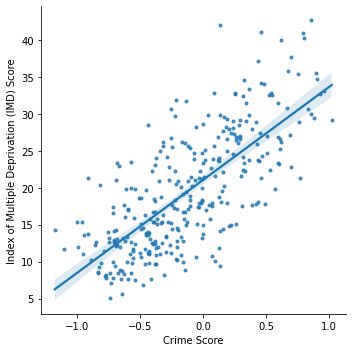

In [15]:
sns.lmplot(x="Crime Score", y="Index of Multiple Deprivation (IMD) Score", data=Dep_Ind_LA, markers='.');

To find whether a local authority district within the UK with a high IMD score also has a high crime rate, I perform a linear regression with the above scatter plot containing a trend line. The scatter plot identifies a positive relationship between the IMD score and the crime score for each local authority district. The regression analysis identifies a coefficient of 0.7049. This means that an increase in the crime score by one-unit results in an increase in the multiple deprovation score by 70.49%. These results also contain a low standard error and t-statistic meaning that the relationship is significant with only a minor variance, showing only a small deviation of the residuals from the coefficient.

This visualisation is intended for policymakers as the purpose of this analysis is to provide an understanding about how to tackle high deprivation levels throughout the country utilising public policy. This visualisation shows that policymakers could target investment towards areas of high deprivation with the purpose of lowering the crime rate to reduce the IMD score of that area. A question that needs to be asked is where to target policy and investment to achieve an optimal social benefit?


# Spatial Analysis

In [1]:
#Required packages improted below for both spatial and non-spatial environments (for use in both geog_env and spatial_env)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Required packages imported below for the spatial analysis (for use in spatial_env)
import geopandas as gpd
import pyproj
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading in the Index of Multiple Deprivation dataset for the spatial analysis
location = r"C:\Users\Michael\Documents\University of Leeds\201799057_Final Project_GEOG5995M\File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv"
Dep_Ind_df = pd.read_csv(location)

In [5]:
Dep_Ind_df.head

<bound method NDFrame.head of       LSOA code (2011) LSOA name (2011) Local Authority District code (2013)  \
0            E01031349        Adur 001A                            E07000223   
1            E01031350        Adur 001B                            E07000223   
2            E01031351        Adur 001C                            E07000223   
3            E01031352        Adur 001D                            E07000223   
4            E01031370        Adur 001E                            E07000223   
...                ...              ...                                  ...   
32839        E01013341        York 024B                            E06000014   
32840        E01013342        York 024C                            E06000014   
32841        E01013423        York 024D                            E06000014   
32842        E01013424        York 024E                            E06000014   
32843        E01013425        York 024F                            E06000014   

      Loc

In [6]:
#Loading in the UK LSOA Geographic dataset for England and Wales only
UK_LSOA_2011 = gpd.read_file('LSOA_Dec_2011_PWC_in_England_and_Wales.shp')

The LSOA (Dec, 2011) population weighted centroids in England and Wales [4] is used as it shares a key identification variable with the IMD dataset (LSOA code 2011) [1]. While the IMD dataset does not include variables or centroids to map the effects of multiple deprivation across England, we can merge the LSOA (Dec, 2011) dataset to provide it with the neccessary coordinate reference system throught the geometry variable in order to map the effects in a spatial analysis. 

In [7]:
UK_LSOA_2011

,lsoa11cd,lsoa11nm,GlobalID,geometry
0,E01012007,Middlesbrough 012A,afa2ed09-f2de-46c7-9af5-a6cf144e0089,POINT (449119.175 517017.509)
1,E01012085,Middlesbrough 010D,da432a35-d526-4a6e-beb1-0d602e60b6cd,POINT (451722.550 517577.735)
2,E01012005,Hartlepool 014G,3cb4cb22-a4af-488b-b6e1-7a0f282d543c,POINT (448657.056 533984.633)
3,E01012084,Middlesbrough 010C,8d0d433d-5685-43ba-ae26-f11c176c799e,POINT (451977.348 517832.468)
4,E01012002,Hartlepool 006D,8123e0de-a96a-4fa4-bbec-99d297ef9c96,POINT (449565.447 533268.699)
...,...,...,...,...
34748,W01000417,Wrexham 020D,b93c4447-531d-4b4b-b4d9-7726ab26c07d,POINT (337219.445 357361.542)
34749,W01000499,Powys 003B,05c30ebe-896e-440d-bff8-45a38f6cea8f,POINT (322960.506 307752.216)
34750,W01001833,Cardiff 033D,03df1f40-e27c-44a3-846a-b36a5c4fe5af,POINT (319631.643 177494.299)
34751,W01000779,Swansea 012D,95ac54b8-2f2d-4b46-83c8-bcf85cf18a0d,POINT (258678.294 196070.614)


In [8]:
#Since the "lsoa11cd" and "LSOA code (2011)" contain the exact same information, I rename the lables of this column within the UK LSOA dataset to macth the Index of Multiple Deprivation dataset
UK_LSOA_2011 = UK_LSOA_2011.rename(columns={'lsoa11cd': 'LSOA code (2011)'})

In [9]:
#Next, I check the coordinate reference system for the UK LSOA 2011 dataset
UK_LSOA_2011.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [12]:
#I then perform an inner merge both the UK LSOA 2011 dataset and the Index of Multiple Deprivation using the LSOA code from 2011
inner_merged_geos_NEW = pd.merge(UK_LSOA_2011, Dep_Ind_df, on=["LSOA code (2011)"])
inner_merged_geos_NEW

,LSOA code (2011),lsoa11nm,GlobalID,geometry,LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Dependent Children aged 0-15: mid 2012 (excluding prisoners),Population aged 16-59: mid 2012 (excluding prisoners),Older population aged 60 and over: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01012007,Middlesbrough 012A,afa2ed09-f2de-46c7-9af5-a6cf144e0089,POINT (449119.175 517017.509),Middlesbrough 012A,E06000002,Middlesbrough,13.231,20429,7,...,29234,9,-0.157,18562,6,1481,215,751,515,751.75
1,E01012085,Middlesbrough 010D,da432a35-d526-4a6e-beb1-0d602e60b6cd,POINT (451722.550 517577.735),Middlesbrough 010D,E06000002,Middlesbrough,66.328,461,1,...,29680,10,0.153,13653,5,1432,340,838,254,835.00
2,E01012005,Hartlepool 014G,3cb4cb22-a4af-488b-b6e1-7a0f282d543c,POINT (448657.056 533984.633),Hartlepool 014G,E06000001,Hartlepool,5.594,29627,10,...,32717,10,-0.866,27716,9,2023,468,1287,268,1271.00
3,E01012084,Middlesbrough 010C,8d0d433d-5685-43ba-ae26-f11c176c799e,POINT (451977.348 517832.468),Middlesbrough 010C,E06000002,Middlesbrough,65.849,492,1,...,27080,9,0.031,15560,5,1636,408,943,285,916.75
4,E01012002,Hartlepool 006D,8123e0de-a96a-4fa4-bbec-99d297ef9c96,POINT (449565.447 533268.699),Hartlepool 006D,E06000001,Hartlepool,23.910,11488,4,...,24529,8,-0.037,16699,6,1387,233,790,364,806.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32839,E01033339,South Gloucestershire 019G,d89bbc0c-fe4e-43f3-9e78-6f29971e49b6,POINT (366510.516 174910.303),South Gloucestershire 019G,E06000025,South Gloucestershire,19.686,14523,5,...,17426,6,-0.568,24453,8,1442,332,883,227,874.75
32840,E01014987,South Gloucestershire 001C,568085c6-c14a-40a4-9b0d-af385d671a61,POINT (363956.575 191102.913),South Gloucestershire 001C,E06000025,South Gloucestershire,2.502,32399,10,...,31889,10,-0.813,27184,9,1231,200,612,419,614.25
32841,E01014902,South Gloucestershire 020B,52bbd90d-3ac5-47d5-af06-1ba30f85ce8f,POINT (364856.901 177974.234),South Gloucestershire 020B,E06000025,South Gloucestershire,1.963,32634,10,...,30310,10,0.336,10996,4,1300,249,642,409,656.25
32842,E01018857,Cornwall 043E,62decd6b-605e-40cb-a005-f97477813371,POINT (181543.200 45232.128),Cornwall 043E,E06000052,Cornwall,36.651,5558,2,...,2376,1,-1.250,30644,10,1209,223,656,330,675.00


In [13]:
#Here, I drop irrelevant columns that will not be used or needed for further analysis
UK_LSOA_Dep_Ind = inner_merged_geos_NEW.drop(columns=['lsoa11nm', 'GlobalID', 'Local Authority District code (2013)', 'Local Authority District name (2013)']) 
UK_LSOA_Dep_Ind

,LSOA code (2011),geometry,LSOA name (2011),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Dependent Children aged 0-15: mid 2012 (excluding prisoners),Population aged 16-59: mid 2012 (excluding prisoners),Older population aged 60 and over: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01012007,POINT (449119.175 517017.509),Middlesbrough 012A,13.231,20429,7,0.101,18171,6,0.085,...,29234,9,-0.157,18562,6,1481,215,751,515,751.75
1,E01012085,POINT (451722.550 517577.735),Middlesbrough 010D,66.328,461,1,0.484,152,1,0.325,...,29680,10,0.153,13653,5,1432,340,838,254,835.00
2,E01012005,POINT (448657.056 533984.633),Hartlepool 014G,5.594,29627,10,0.047,28624,9,0.058,...,32717,10,-0.866,27716,9,2023,468,1287,268,1271.00
3,E01012084,POINT (451977.348 517832.468),Middlesbrough 010C,65.849,492,1,0.472,203,1,0.342,...,27080,9,0.031,15560,5,1636,408,943,285,916.75
4,E01012002,POINT (449565.447 533268.699),Hartlepool 006D,23.910,11488,4,0.204,8111,3,0.166,...,24529,8,-0.037,16699,6,1387,233,790,364,806.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32839,E01033339,POINT (366510.516 174910.303),South Gloucestershire 019G,19.686,14523,5,0.139,13573,5,0.099,...,17426,6,-0.568,24453,8,1442,332,883,227,874.75
32840,E01014987,POINT (363956.575 191102.913),South Gloucestershire 001C,2.502,32399,10,0.035,30793,10,0.039,...,31889,10,-0.813,27184,9,1231,200,612,419,614.25
32841,E01014902,POINT (364856.901 177974.234),South Gloucestershire 020B,1.963,32634,10,0.031,31460,10,0.039,...,30310,10,0.336,10996,4,1300,249,642,409,656.25
32842,E01018857,POINT (181543.200 45232.128),Cornwall 043E,36.651,5558,2,0.215,7350,3,0.188,...,2376,1,-1.250,30644,10,1209,223,656,330,675.00


In [14]:
#Exploring the data types of my cleaned UK LSOA and Index of Multiple Deprivation 2011 datset
UK_LSOA_Dep_Ind.dtypes

LSOA code (2011)                                                                                        object
geometry                                                                                              geometry
LSOA name (2011)                                                                                        object
Index of Multiple Deprivation (IMD) Score                                                              float64
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                                      int64
Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)                       int64
Income Score (rate)                                                                                    float64
Income Rank (where 1 is most deprived)                                                                   int64
Income Decile (where 1 is most deprived 10% of LSOAs)                                                    int64
E

In [15]:
#Checking the coordinate reference system against the newly cleaned dataset
UK_LSOA_Dep_Ind.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

Firstly, I rename the column in the LSOA (Dec, 2011) dataset from "lsoa11cd" to "LSOA code (2011)" to match the identification variable of the same name in the IMD and to facilitate a merge of the datasets. This variable is the same in both datasets providing identical information. Finally, I drop the columns that are irrelevant to this analysis which includes the unused identification variables. The new dataset is then checked using a coordinate reference system to make sure it is appropriate for a spatial analysis.

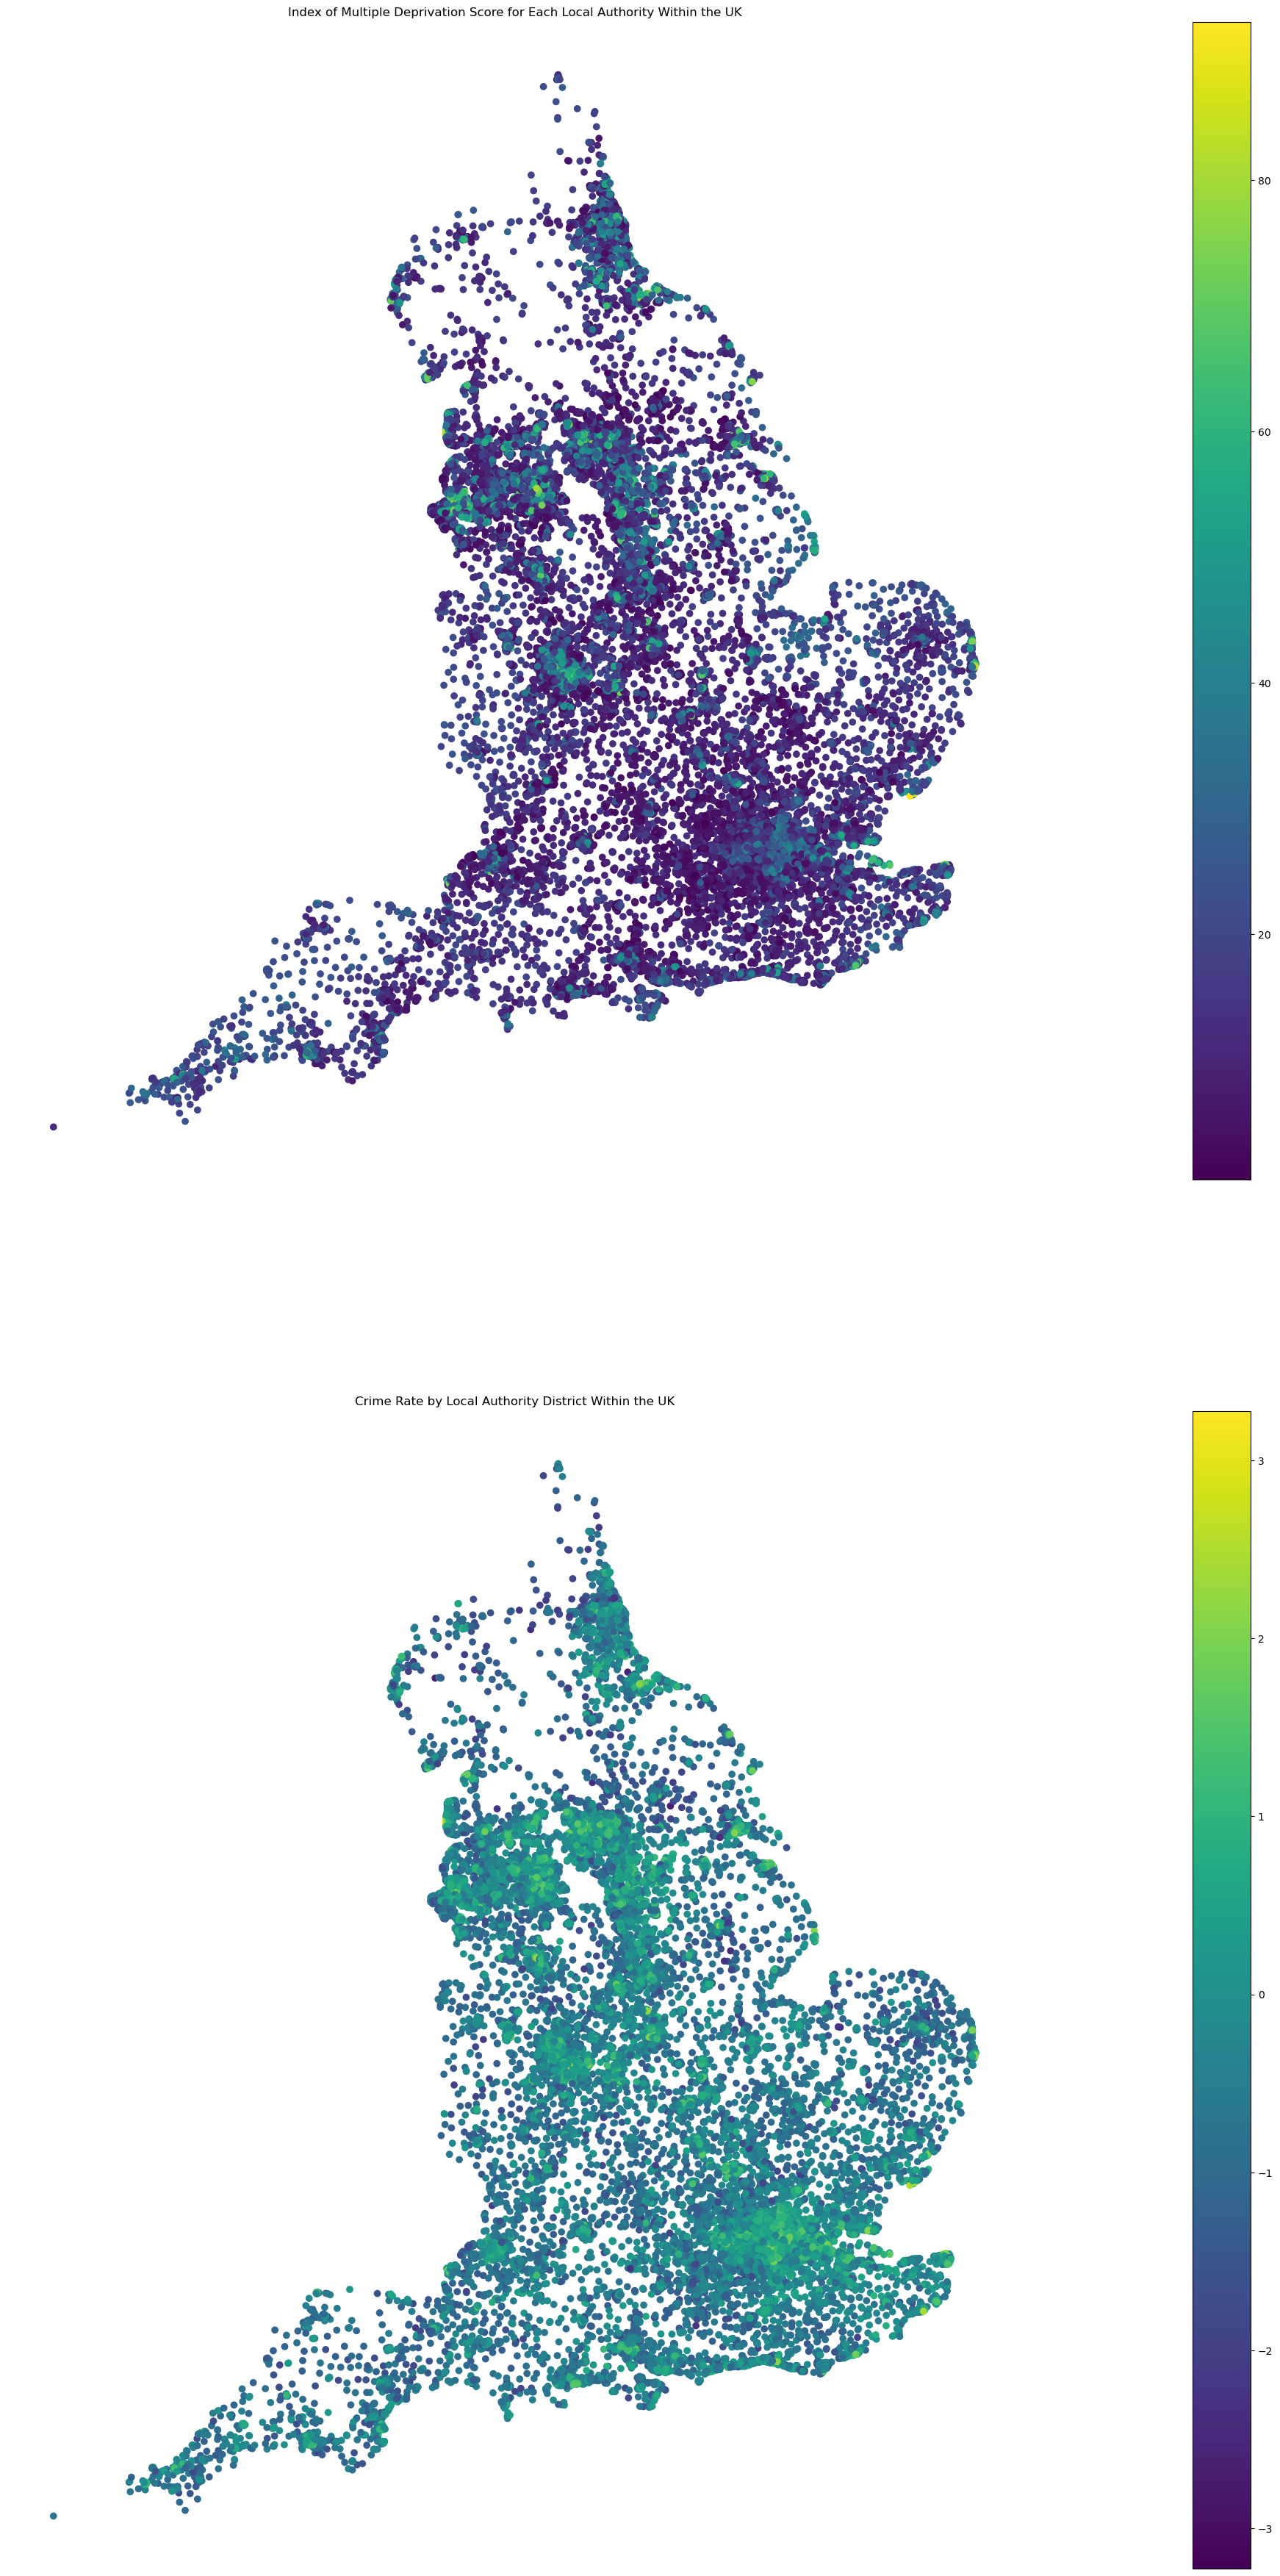

In [16]:
#Creating the final visualisation to identify where the most deprived areas in the UK and the employment rate for each area
f,ax = plt.subplots(2, figsize=(60,45))
UK_LSOA_Dep_Ind.plot(ax=ax[0], column ='Index of Multiple Deprivation (IMD) Score', legend=True)
UK_LSOA_Dep_Ind.plot(ax=ax[1], column ='Crime Score', legend=True)
ax[0].set_title('Index of Multiple Deprivation Score for Each Local Authority Within the UK')
ax[1].set_title('Crime Rate by Local Authority District Within the UK')
ax[0].set_axis_off()
ax[1].set_axis_off()
plt.show()

The first choropleth map identifies the highest clusters of multiple deprivation within the north-west of England, London, and areas along the coast of England. However, The surrounding areas of London to the south, west, and north show low levels of deprivation. This may be due to London containing the highest concerntration of population within the UK as shown by the high concerntration of residuals around and within London on the choropleth map.

The bottom choropleth map identifies the crime rate across England with the lighter the colour of the residual representing a higher crime rate for that area. A similar pattern can be found where the highest concerntration of residuals with high crime rates is within the north-west of England and London highlighting that when crime levels increase so does the IMD score. This identifies a similar positive relationship that was found within the linear regression analysis. I recommend future research to control for population density to obtain the true causal effect.

This visualisation was chosen as it identifies the concerntration of residuals where both the IMD and crime score are highest and the lowest. Using the choropleth map we can identify which areas within the country that requires investment to reduce the crime rate so deprivation can be reduced which makes this visualisation and analysis useful for policymakers.

## References
<p><a href="https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015">[1]</a>Ministry of Housing, Communities, and Local Government, 2015a. English Indices of Deprivation 2015. Office of National Statistics. Avaliable at: https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015</p>
<p><a href="https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015">[2]</a>Ministry of Housing, Communities, and Local Government, 2015b. Infographic. Office of National Statistics. Avaliable at: https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5995">[3]</a>Pontin, 2023. GEOG5995M course materials. University of Leeds.</p>
<p><a href="https://www.arcgis.com/home/item.html?id=54a76a36e3b4420a9ea83fcf7994525d">[4]</a>Office for National Statistics, 2015. LSOA (Dec, 2011) population weighted centroids in England and Wales. Office for National Statistcis Geopgrpahy Data. Avaliable at https://geoportal.statistics.gov.uk/</p>
<p><a href="https://github.com/Michael-W-Morton/GEOG5995M-Final-Project">[5]</a>Morton, 2023. GEOG5995M Final Project Repository. University of Leeds</p>
<p><a href="https://assets.publishing.service.gov.uk/media/62e7a429d3bf7f75af0923f3/Executive_Summary.pdf">[6]</a>Department of Levelling Up, Housing and Communities, 2022. Levelling Up the United Kingdom Executive Summary. HM Government. Avaliable at: https://www.gov.uk/government/publications/levelling-up-the-united-kingdom</p>